In [1]:
# Support Vector Machines classifier and Kernel transformation SVM

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn-v0_8-whitegrid')

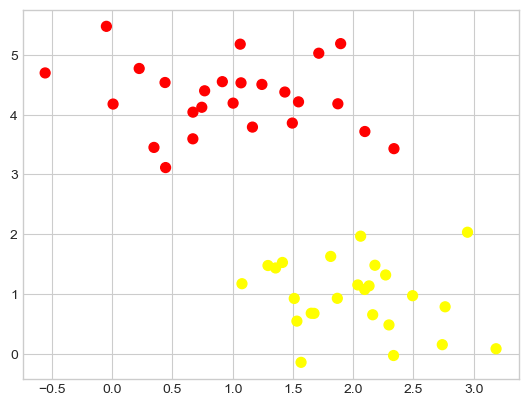

In [5]:
# Import and visualzation of dataset from SciKit-Learn
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

Support vectors: 
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


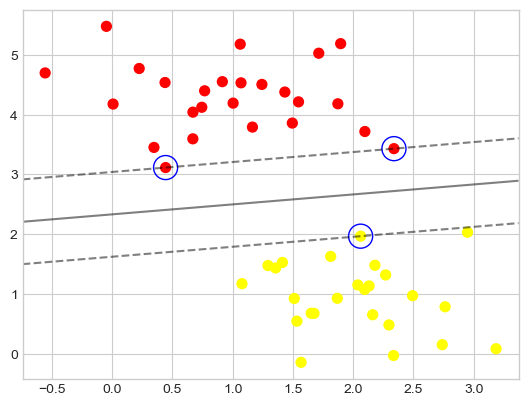

In [7]:
# Training and Visualzation of data using SVM from SciKit-Learn
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Drawing the boundaries of the decision-making area and margin
    ax.contour(X, Y, P, colors="k", 
                levels=[-1,-0,1], alpha=0.5,
                linestyles=['--', '-', '--'])
    # Drawing support vector 
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth=1, edgecolors='blue',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
  
print("Support vectors: \n", model.support_vectors_)

In [9]:
# Kernel transformation SVM

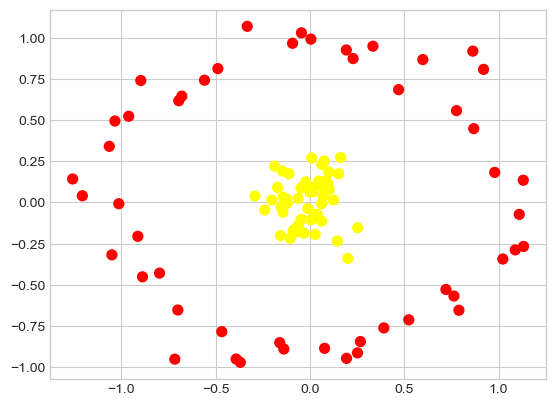

In [11]:
# Import and visualization of dataset from SciKit-Learn
from sklearn.datasets import make_circles

X,y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

Support vectors: 
 [[-0.69490414  0.61748376]
 [-0.15974644 -0.85172432]
 [ 0.47003355  0.68474815]
 [ 0.97950149  0.18227429]
 [ 0.39181588 -0.76230655]
 [-0.7969134  -0.42941239]
 [-0.55852204  0.74215664]
 [ 0.72093429 -0.52873815]
 [-0.9118321  -0.20598995]
 [ 0.20105772 -0.34002262]
 [-0.29118561  0.03891772]
 [ 0.16313421  0.27290381]]


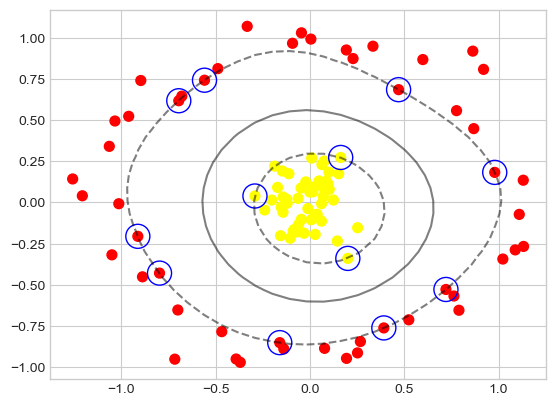

In [13]:
# Support Vector Machines as a classifier using kernel RBF (kernel transformation) - training and visualization
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf) # using a previously created function
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=300, lw=1, facecolors='None');

print("Support vectors: \n", clf.support_vectors_)

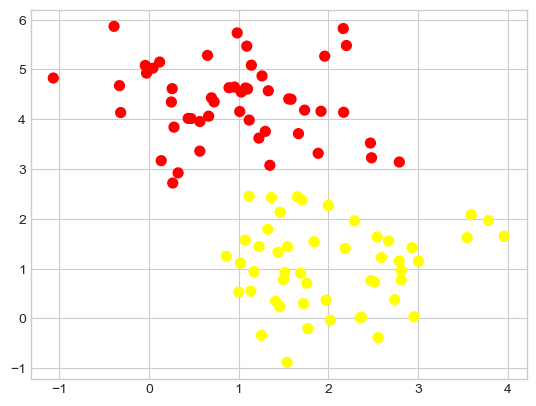

In [15]:
# SVM fine-tuning
## Import and visualization of dataset from SciKit-Learn

X,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

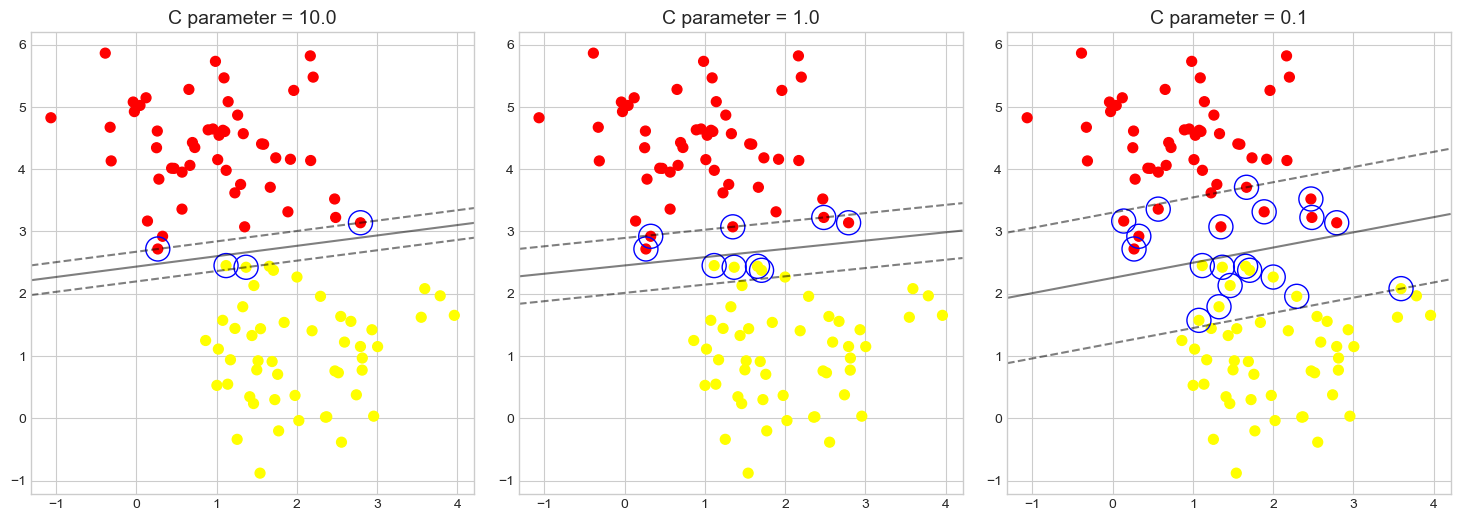

In [17]:
# Drawing 3 plots with different value of C parameter to check the impact of model fine-tuning
fig, ax = plt.subplots(1,3, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 1,  0.1]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=300, lw=1, facecolors='None')
    axi.set_title('C parameter = {0:.1f}'.format(C), size=14)           